# Fundamentos de Machine Learning

**Alunos**:

* Andrea Monicque dos Santos Silva (amdss.cid20@uea.edu.br)
* Francisco Marcelo Mendes Damasceno (fmmd.cid20@uea.edu.br)
* Marcos Wenneton Araújo (mwvda.cid20@uea.edu.br)
* Lucas Pereira Reis (lpr.cid20@uea.edu.br)

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, normalize
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.metrics import classification_report_imbalanced
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import time
from collections import Counter
from math import sqrt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

## Base de Dados

Este dataset foi obtido do Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

**Sobre o dataset: Detecção de fraude de cartão de crédito**

O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) é responsável por 0,172% de todas as transações.

Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não foi possível fornecer os recursos originais e mais informações básicas sobre os dados. Os recursos V1, V2,… V28 são os componentes principais obtidos com o PCA, os únicos recursos que não foram transformados com o PCA são 'Tempo' e 'Quantidade'. O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Amount' é o valor da transação. O recurso 'Classe' é a variável de resposta e assume o valor 1 em caso de fraude e 0 em caso contrário.

O conjunto de dados foi coletado e analisado durante uma colaboração de pesquisa da Worldline e do Machine Learning Group ( http://mlg.ulb.ac.be ) da ULB (Université Libre de Bruxelles) sobre mineração de big data e detecção de fraude.
Mais detalhes sobre projetos atuais e anteriores sobre tópicos relacionados estão disponíveis em https://www.researchgate.net/project/Fraud-detection-5 e na página do projeto DefeatFraud.


In [2]:
# Downloading and extracting the dataset
!wget http://underlabs.org/datasets/creditcard.zip -O creditcard.zip
!unzip -o creditcard.zip

--2021-06-26 01:14:53--  http://underlabs.org/datasets/creditcard.zip
Resolving underlabs.org (underlabs.org)... 45.79.220.137
Connecting to underlabs.org (underlabs.org)|45.79.220.137|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditcard.zip’

creditcard.zip      100%[===================>]  65.95M  34.7MB/s    in 1.9s    

2021-06-26 01:14:55 (34.7 MB/s) - ‘creditcard.zip’ saved [69155672/69155672]

Archive:  creditcard.zip
  inflating: creditcard.csv          


In [3]:
df = pd.read_csv('creditcard.csv')

## Análise e Exploração dos Dados

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Análisando o dataset**

Este é composto por 31 campos de dados onde 30 são floats e 1 é inteiro, sendo este a classe  que é a categorização da transação, se é fraudulenta ou não. O dataset contém 284807 registros de dados e não há presença de nullos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Virificação de dados faltantes**



Não há presença de dados faltantes no dataset.

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Análise estatística**

Na maioria dos campos há alta variabilidade dos dados, onde estes estão distantes da média.É possível visualizar também ao olharmos para os percentis abaixo.

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


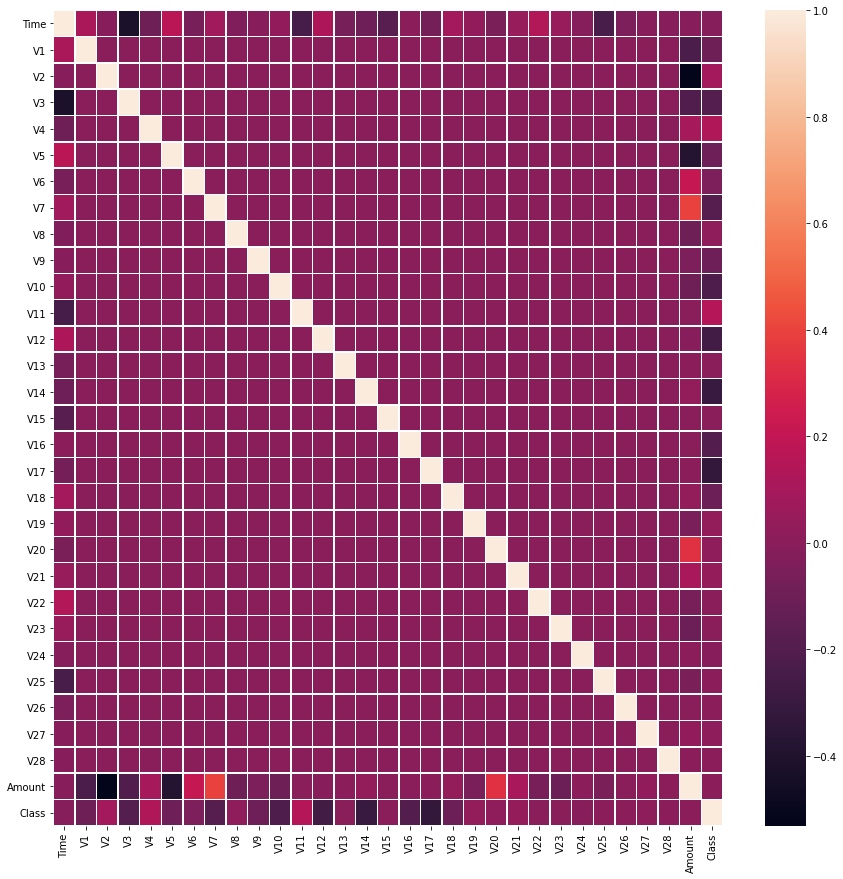

In [8]:
# Matriz de Correlação

corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=False, linewidths=.5, ax=ax)
plt.show()

As 3 variáveis com  maior correlação, mesmo esta sendo baixa, são V11 E V4, as demais se aproximam mais de zero ou se compreendem abaixo. As variáveis v17 e v14 são os que tem a maior correlação negativa demonstrando irem em direção inversa a variável target Class.

In [9]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

Conforme informado na descrição do dataset, este está desbalanceado tendo menos amostras de transações fraudulentas e tendo 0 (transações normais) como classe majoritária. Abaixo foi plotado um gráfico para visualizar melhor essa diferença.

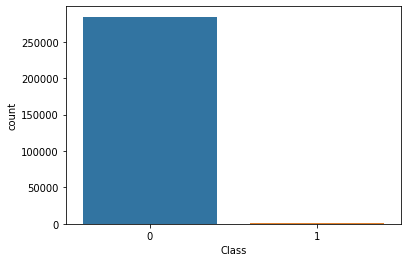

In [10]:
sns.countplot(df['Class'])

## Aprendizagem Supervisionada

### KNN

In [11]:
df_knn = df.copy()

#### Normalizando features

In [12]:
df_knn['S_AMOUNT'] = MinMaxScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df_knn["H_TIME"] = df["Time"]/3600

In [13]:
X_knn = df_knn.drop(['Class','Time','Amount'], axis=1).values
y_knn = df_knn['Class']

#### Encontrando o melhor valor de K

In [14]:
knn = KNeighborsClassifier(metric='euclidean')
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {"n_neighbors" : range(3, 6)}
 
experiment = GridSearchCV(knn, param_grid=param_grid, cv=kfold)

# Essa execução demora vários minutos por isso está comentada
# experiment.fit(X_train, y_train)
# print(f"best params: {experiment.best_params_}")
# print(f"best cv accuracy: {experiment.best_score_:0.3}")

#### Separando os dados de Treino e Teste

In [15]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42, stratify=y_knn)

#### Treinando o Modelo

In [16]:
# Desbalanceado
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', n_jobs=-1)
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')

In [17]:
# Balanceado com SMOTE
smote = SMOTE(random_state=42)
X_smote_train_knn, y_smote_train_knn = smote.fit_resample(X_train_knn, y_train_knn)
knns = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', n_jobs=-1)
knns.fit(X_smote_train_knn, y_smote_train_knn)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')

In [18]:
# Balanceado com ADASYN
ada = ADASYN(random_state=42)
X_ada_train, y_ada_train = ada.fit_resample(X_train_knn, y_train_knn)
knna = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', n_jobs=-1)
knna.fit(X_ada_train, y_ada_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')

### Naive Bayes

In [19]:
df_nb = df.copy()

#### Normalizando features

In [20]:
df_nb['S_AMOUNT'] = MinMaxScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df_nb["H_TIME"] = df["Time"]/3600

In [21]:
X_nb = df_nb.drop(['Class','Time','Amount'], axis=1).values
y_nb = df_nb['Class']

#### Separando os dados de Treino e Teste

In [22]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.3, random_state=42, stratify=y_nb)

#### Treinando o Modelo

In [23]:
# Desbalanceado

# Essa normalização é necessária pois o ComplementNB não trabalha com valores negativos
scaler = MinMaxScaler()
X_train_nb = scaler.fit_transform(X_train_nb)
X_test_nb = scaler.fit_transform(X_test_nb)

nb = ComplementNB()
nb.fit(X_train_nb, y_train_nb)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [24]:
# Balanceado com SMOTE
smote = SMOTE(random_state=42)
X_smote_train_nb, y_smote_train_nb = smote.fit_resample(X_train_nb, y_train_nb)
nbs = ComplementNB()
nbs.fit(X_smote_train_nb, y_smote_train_nb)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [25]:
# Balanceado com ADASYN
ada = ADASYN(random_state=42)
X_ada_train_nb, y_ada_train_nb = ada.fit_resample(X_train_nb, y_train_nb)
nba = ComplementNB()
nba.fit(X_ada_train_nb, y_ada_train_nb)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

### Random Forest

In [26]:
df_rf = df.copy()

#### Normalizando features

In [27]:
rs = RobustScaler()

df_rf['Amount'] = rs.fit_transform(df_rf['Amount'].values.reshape(-1, 1))

In [28]:
x_rf = df_rf.drop(['Class', 'Time'], axis=1)
y_rf = df_rf['Class']

#### Separando os dados de Treino e Teste

In [29]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size=0.3, random_state=42)

#### Treinando o Modelo

In [30]:
rf_unbalanced = RandomForestClassifier(n_estimators=10, random_state=42)
rf_unbalanced.fit(x_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [31]:
smote = SMOTE(random_state=42)
x_smote_train_rf, y_smote_train_rf = smote.fit_resample(x_train_rf, y_train_rf)

rf_smote = RandomForestClassifier(n_estimators=10, random_state=42)
rf_smote.fit(x_smote_train_rf, y_smote_train_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
adasyn = ADASYN(random_state=42)
x_adasyn_train_rf, y_adasyn_train_rf = adasyn.fit_resample(x_train_rf, y_train_rf)

rf_adasyn = RandomForestClassifier(n_estimators=10, random_state=42)
rf_adasyn.fit(x_adasyn_train_rf, y_adasyn_train_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Redes Neurais

In [33]:
df_mlp = df.copy()

#### Normalizando features

In [34]:
rs = RobustScaler()

df_mlp['Amount'] = rs.fit_transform(df_mlp['Amount'].values.reshape(-1, 1))

In [35]:
x_mlp = df_mlp.drop(['Class', 'Time'], axis=1)
y_mlp = df_mlp['Class']

#### Separando os dados de Treino e Teste

In [36]:
x_train_mlp, x_test_mlp, y_train_mlp, y_test_mlp = train_test_split(x_mlp, y_mlp, test_size=0.3, random_state=42)

#### Treinando o Modelo

In [37]:
mlp_unbalanced = MLPClassifier(random_state=42)
mlp_unbalanced.fit(x_train_mlp, y_train_mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [38]:
smote = SMOTE(random_state=42)
x_smote_train_mlp, y_smote_train_mlp = smote.fit_resample(x_train_mlp, y_train_mlp)

mlp_smote = MLPClassifier(random_state=42)
mlp_smote.fit(x_smote_train_mlp, y_smote_train_mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
adasyn = ADASYN(random_state=42)
x_adasyn_train_mlp, y_adasyn_train_mlp = adasyn.fit_resample(x_train_mlp, y_train_mlp)

mlp_adasyn = MLPClassifier(random_state=42)
mlp_adasyn.fit(x_adasyn_train_mlp, y_adasyn_train_mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Aprendizagem Não-Supervisionada

### K-Means

####**Buscando o valor de K**

- **Aplicando método Cotuvelo - Soma dos Quadrados**


A ideia é rodar o KMeans para vários quantidades diferentes de clusters e dizer qual dessas quantidades é o número ótimo de clusters

In [40]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, max_iter= 300)
  kmeans.fit(df.drop(["Class"],axis=1))
  wcss.append(kmeans.inertia_)

inertia_ corresponde ao somatório dos erros quadráticos das instâncias de cada cluster

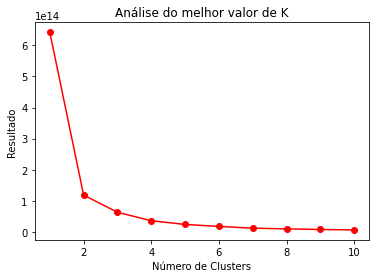

In [41]:
plt.plot(range(1,11), wcss, marker='o', color='red')
plt.xlabel('Número de Clusters')
plt.ylabel('Resultado')
plt.title('Análise do melhor valor de K')
plt.show()

Como é esperado o melhor valor de K encontrado é 2. Podemos analisar através do gráfico acima que o valor de wcss diminui conforme o valor de K aumenta de modo que quando cluster é igual a 10 o valor de wcss é muito pequeno em comparação de quando K é igual a 1 o que é bom, porém estaríamos fazendo muitas partições. Podemos ver claramente que a partir do número de dois clusters não temos uma diminuição tão expressiva, logo vemos que ele é melhor valor de K.

####**Experimento 1**

Neste trabalhamos com todo o conjunto de dados removendo apenas a variável Class (Rótulo). Este é dividido em full_labels que armazena a variável Class e 

In [42]:
tic=time.time()

full_data=df.sample(frac=1) #randomizando todo o conjunto de dados
full_features=full_data.drop(["Class"],axis=1)
full_labels=pd.DataFrame(full_data[["Class"]])
full_features_array=full_features.values
full_labels_array=full_labels.values

#Separando o conjunto de treino e teste
train_features,test_features,train_labels,test_labels=train_test_split(full_features_array,full_labels_array,train_size=0.70)

#Normalizando Dados
train_features=normalize(train_features)
test_features=normalize(test_features)

#k_means_classification --> k_means_clustering, confsion_matrix, reassigning
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(train_features)

#teste de predição com dados de treino
kmeans_predicted_train_labels=kmeans.predict(train_features)


#confusion matrix
# tn fp
# fn tp
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")

tn,fp,fn,tp=confusion_matrix(train_labels,kmeans_predicted_train_labels).ravel()
reassignflag=False

if tn+tp<fn+fp:
	# o agrupamento é o oposto da classificação original
	reassignflag=True

#teste de predição com dados de teste
kmeans_predicted_test_labels=kmeans.predict(test_features)

if reassignflag:
	kmeans_predicted_test_labels=1-kmeans_predicted_test_labels


#calculando a matriz de confusão para o kmeans
tn,fp,fn,tp=confusion_matrix(test_labels,kmeans_predicted_test_labels).ravel()

#scoring kmeans - tarabalhando com a amostra de teste e o resultado do modelo
kmeans_accuracy_score = accuracy_score(test_labels,kmeans_predicted_test_labels)
kmeans_precison_score = precision_score(test_labels,kmeans_predicted_test_labels)
kmeans_recall_score = recall_score(test_labels,kmeans_predicted_test_labels)
kmeans_f1_score = f1_score(test_labels,kmeans_predicted_test_labels)


#printing
print("")
print("K-Means")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",kmeans_accuracy_score)
print("Precison -->",kmeans_precison_score)
print("Recall -->",kmeans_recall_score)
print("F1 -->",kmeans_f1_score)

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives

K-Means
Confusion Matrix
tn = 85241 fp = 52
fn = 150 tp = 0
Scores
Accuracy --> 0.9976358508011188
Precison --> 0.0
Recall --> 0.0
F1 --> 0.0


####**Experimento 2**

In [43]:
tic=time.time()

full_data=df.sample(frac=1) #randomizando todo o conjunto de dados
full_features=full_data.drop(["Time","Class"],axis=1)
full_labels=pd.DataFrame(full_data[["Class"]])
full_features_array=full_features.values
full_labels_array=full_labels.values

#Separando o conjunto de treino e teste
train_features,test_features,train_labels,test_labels=train_test_split(full_features_array,full_labels_array,train_size=0.70)

#Normalizando Dados
train_features=normalize(train_features)
test_features=normalize(test_features)

#k_means_classification --> k_means_clustering, confsion_matrix, reassigning
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(train_features)

#teste de predição com dados de treino
kmeans_predicted_train_labels=kmeans.predict(train_features)


#confusion matrix
# tn fp
# fn tp
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")

tn,fp,fn,tp=confusion_matrix(train_labels,kmeans_predicted_train_labels).ravel()
reassignflag=False

if tn+tp<fn+fp:
	# o agrupamento é o oposto da classificação original
	reassignflag=True

#teste de predição com dados de teste
kmeans_predicted_test_labels=kmeans.predict(test_features)

if reassignflag:
	kmeans_predicted_test_labels=1-kmeans_predicted_test_labels


#calculando a matriz de confusão para o kmeans
tn,fp,fn,tp=confusion_matrix(test_labels,kmeans_predicted_test_labels).ravel()

#scoring kmeans - tarabalhando com a amostra de teste e o resultado do modelo
kmeans_accuracy_score = accuracy_score(test_labels,kmeans_predicted_test_labels)
kmeans_precison_score = precision_score(test_labels,kmeans_predicted_test_labels)
kmeans_recall_score = recall_score(test_labels,kmeans_predicted_test_labels)
kmeans_f1_score = f1_score(test_labels,kmeans_predicted_test_labels)


#printing
print("")
print("K-Means")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",kmeans_accuracy_score)
print("Precison -->",kmeans_precison_score)
print("Recall -->",kmeans_recall_score)
print("F1 -->",kmeans_f1_score)

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives

K-Means
Confusion Matrix
tn = 67873 fp = 17422
fn = 65 tp = 83
Scores
Accuracy --> 0.7953372423721077
Precison --> 0.00474150242787775
Recall --> 0.5608108108108109
F1 --> 0.009403500821390133


###Isolation Forest

In [44]:
df_iso_for = df.copy()

In [45]:
df_iso_for['Amount'] = MinMaxScaler().fit_transform(df_iso_for['Amount'].values.reshape(-1,1))
df_iso_for = df_iso_for.drop(columns=['Time'])

In [46]:
legit = df_iso_for[df_iso_for.Class==0].copy()
legit = legit.drop(['Class'], axis=1)
fraud = df_iso_for[df_iso_for.Class==1].copy()
fraud = fraud.drop(['Class'], axis=1)
legit_train, legit_test = train_test_split(legit, test_size=0.30, random_state=42)

In [47]:
iso_for = IsolationForest(random_state=42)
iso_for.fit(legit_train)
legit_pred_test = iso_for.predict(legit_test)
fraud_pred = iso_for.predict(fraud)

In [48]:
print("Accuracy in Detecting Legit Cases:", list(legit_pred_test).count(1)/legit_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(fraud_pred).count(-1)/fraud_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.9639955448736737
Accuracy in Detecting Fraud Cases: 0.8272357723577236


In [49]:
# Adjusting model outputs

legit_pred_test = np.where(legit_pred_test==1, 0, legit_pred_test)
legit_pred_test = np.where(legit_pred_test==-1, 1, legit_pred_test)
fraud_pred = np.where(fraud_pred==1, 0, fraud_pred)
fraud_pred = np.where(fraud_pred==-1, 1, fraud_pred)

prediction_iso_for = np.concatenate((legit_pred_test, fraud_pred))
y_test_iso_for = np.concatenate((np.repeat(0, len(legit_pred_test)), np.repeat(1, len(fraud_pred))))

## Avaliação dos Modelos e Métricas

#### Utilitários

In [50]:
# Estrutura de Dicionário para facilitar a organização, predição e report das métricas
models = {
    'knn':{
        'name': 'KNN Unbalanced',
        'obj': knn,
        'prediction' : None
    },
    'knns': {
        'name': 'KNN SMOTE',
        'obj': knns,
        'prediction' : None,
    },
    'knna': {
        'name': 'KNN ADASYN',
        'obj': knna,
        'prediction' : None,
    },
    'nb':{
        'name': 'Naive Bayes Unbalanced',
        'obj': nb,
        'prediction' : None
    },
    'nbs': {
        'name': 'Naive Bayes SMOTE',
        'obj': nbs,
        'prediction' : None,
    },
    'nba': {
        'name': 'Naive Bayes ADASYN',
        'obj': nba,
        'prediction' : None,
    },
    'rf': {
        'name': 'Random Forest Unbalanced',
        'obj': rf_unbalanced,
        'prediction': None
    },
    'rfs': {
        'name': 'Random Forest SMOTE',
        'obj': rf_smote,
        'prediction': None
    },
    'rfa': {
        'name': 'Random Forest ADASYN',
        'obj': rf_adasyn,
        'prediction': None
    },
    'mlp': {
        'name': 'Neural Network Unbalanced',
        'obj': mlp_unbalanced,
        'prediction': None
    },
    'mlps': {
        'name': 'Neural Network SMOTE',
        'obj': mlp_smote,
        'prediction': None
    },
    'mlpa': {
        'name': 'Neural Network ADASYN',
        'obj': mlp_adasyn,
        'prediction': None
    },
    'kmeans': {
        'name': 'K-Means',
        'obj': kmeans,
        'prediction': None
    },
    'isolation_forest': {
        'name': 'Isolation Forest',
        'obj': iso_for,
        'prediction': None
    }
}

In [51]:
# Função auxiliar que retorna as métricas
def get_metrics(model, y_test):
  return {
      'accuracy': accuracy_score(y_test, model['prediction']),
      'precision': precision_score(y_test, model["prediction"]),
      'recall': recall_score(y_test, model['prediction']),
      'f1score': f1_score(y_test, model['prediction']),
      'rocauc': roc_auc_score(y_test, model['prediction'])
  }

In [52]:
# Função para gerar e imprimir a matriz de confusão
def print_cm(clf, y_true, preds):
  if type(clf) in (IsolationForest, KMeans) :
    cm = confusion_matrix(y_true, preds, labels=[0,1])
  else:
    cm = confusion_matrix(y_true, preds, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['Non-Fraud','Fraud'])
  disp.plot(values_format='.5g', cmap=plt.cm.Blues)

In [53]:
# Função para gerar e imprimir as métricas para avaliação dos modelos
def print_report(model, y_test, cm=True):
    print(f"******* Model: {model['name']} *******")
    print(f'Classification Report: \n{classification_report(y_test, model["prediction"])}')
    print(f'Accuracy: {accuracy_score(y_test, model["prediction"])}')
    print(f'Precision: {precision_score(y_test, model["prediction"])}')
    print(f'Recall: {recall_score(y_test, model["prediction"])}')
    print(f'F1 Score: {f1_score(y_test, model["prediction"])}')
    print(f'ROC AUC Score: {roc_auc_score(y_test, model["prediction"])}')
    
    if cm:
      print_cm(model['obj'], y_test, model["prediction"])

### Realizando Predições (Predictions)

In [54]:
# KNN
models["knn"]["prediction"] = knn.predict(X_test_knn)
models["knns"]["prediction"] = knns.predict(X_test_knn)
models["knna"]["prediction"] = knna.predict(X_test_knn)

In [55]:
# Naive Bayes
models["nb"]["prediction"] = nb.predict(X_test_nb)
models["nbs"]["prediction"] = nbs.predict(X_test_nb)
models["nba"]["prediction"] = nba.predict(X_test_nb)

In [56]:
# Random Forest
models["rf"]["prediction"] = rf_unbalanced.predict(x_test_rf)
models["rfs"]["prediction"] = rf_smote.predict(x_test_rf)
models["rfa"]["prediction"] = rf_adasyn.predict(x_test_rf)

In [57]:
# MLP
models["mlp"]["prediction"] = mlp_unbalanced.predict(x_test_mlp)
models["mlps"]["prediction"] = mlp_smote.predict(x_test_mlp)
models["mlpa"]["prediction"] = mlp_adasyn.predict(x_test_mlp)

In [58]:
# Isolation Forest
models["isolation_forest"]["prediction"] = prediction_iso_for

In [59]:
# K-Means
models["kmeans"]["prediction"] = kmeans_predicted_test_labels

#### Atualizando as métricas na estrutura

In [60]:
# KNN
models["knn"]["metrics"] = get_metrics(models['knn'], y_test_knn)
models["knns"]["metrics"] = get_metrics(models['knns'], y_test_knn)
models["knna"]["metrics"] = get_metrics(models['knna'], y_test_knn)

# Naive Bayes
models["nb"]["metrics"] = get_metrics(models['nb'], y_test_nb)
models["nbs"]["metrics"] = get_metrics(models['nbs'], y_test_nb)
models["nba"]["metrics"] = get_metrics(models['nba'], y_test_nb)

# Random Forest
models["rf"]["metrics"] = get_metrics(models['rf'], y_test_rf)
models["rfs"]["metrics"] = get_metrics(models['rfs'], y_test_rf)
models["rfa"]["metrics"] = get_metrics(models['rfa'], y_test_rf)

# MLP
models["mlp"]["metrics"] = get_metrics(models['mlp'], y_test_mlp)
models["mlps"]["metrics"] = get_metrics(models['mlps'], y_test_mlp)
models["mlpa"]["metrics"] = get_metrics(models['mlpa'], y_test_mlp)

# Isolation Forest
models["isolation_forest"]["metrics"] = get_metrics(models['isolation_forest'], y_test_iso_for)

# K-Means
models["kmeans"]["metrics"] = get_metrics(models['kmeans'], test_labels)

### Gerando Report

In [61]:
# Data Frame com as métricas de todos os modelos avaliados
model_metrics = {}
for k,v in models.items():
  model_metrics[v['name']] = v['metrics']
dfm = pd.DataFrame(model_metrics)

In [62]:
# Sorted by F1 Score and ROC-AUC
dfm.transpose().sort_values(by=['f1score','rocauc'], ascending=False)

,accuracy,precision,recall,f1score,rocauc
Neural Network Unbalanced,0.999555,0.882812,0.830882,0.856061,0.915353
Random Forest ADASYN,0.999532,0.847826,0.860294,0.854015,0.930024
Random Forest SMOTE,0.999520,0.846715,0.852941,0.849817,0.926348
Random Forest Unbalanced,0.999532,0.928571,0.764706,0.838710,0.882306
KNN Unbalanced,0.999450,0.963303,0.709459,0.817121,0.854706
Neural Network SMOTE,0.999192,0.703030,0.852941,0.770764,0.926183
Neural Network ADASYN,0.998818,0.587065,0.867647,0.700297,0.933337
Naive Bayes SMOTE,0.999087,0.818182,0.608108,0.697674,0.803937
Naive Bayes Unbalanced,0.998947,0.737705,0.608108,0.666667,0.803866
KNN SMOTE,0.998619,0.575000,0.777027,0.660920,0.888015


In [63]:
dfm.transpose().sort_values(by=['f1score','rocauc'], ascending=False).to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &  accuracy &  precision &    recall &   f1score &    rocauc \\\\\n\\midrule\nNeural Network Unbalanced &  0.999555 &   0.882812 &  0.830882 &  0.856061 &  0.915353 \\\\\nRandom Forest ADASYN      &  0.999532 &   0.847826 &  0.860294 &  0.854015 &  0.930024 \\\\\nRandom Forest SMOTE       &  0.999520 &   0.846715 &  0.852941 &  0.849817 &  0.926348 \\\\\nRandom Forest Unbalanced  &  0.999532 &   0.928571 &  0.764706 &  0.838710 &  0.882306 \\\\\nKNN Unbalanced            &  0.999450 &   0.963303 &  0.709459 &  0.817121 &  0.854706 \\\\\nNeural Network SMOTE      &  0.999192 &   0.703030 &  0.852941 &  0.770764 &  0.926183 \\\\\nNeural Network ADASYN     &  0.998818 &   0.587065 &  0.867647 &  0.700297 &  0.933337 \\\\\nNaive Bayes SMOTE         &  0.999087 &   0.818182 &  0.608108 &  0.697674 &  0.803937 \\\\\nNaive Bayes Unbalanced    &  0.998947 &   0.737705 &  0.608108 &  0.666667 &  0.803866 \\\\\nKNN SMOTE                 &  0.998619 &   0.

In [64]:
# Para que a matriz seja impressa logo após os dados corespondentes
# é preciso chamar o print para cada modelo em célula separada, senão
# ele imprime todos os reports e só depois plota os gráficos.

#### KNN

******* Model: KNN Unbalanced *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9994499256814484
Precision: 0.963302752293578
Recall: 0.7094594594594594
F1 Score: 0.8171206225680935
ROC AUC Score: 0.8547062816964336


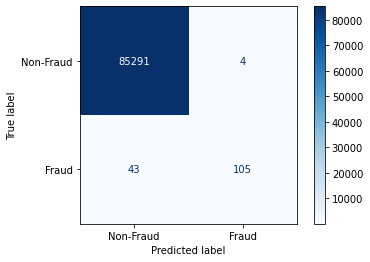

In [65]:
print_report(models["knn"], y_test_knn)

******* Model: KNN SMOTE *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.57      0.78      0.66       148

    accuracy                           1.00     85443
   macro avg       0.79      0.89      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9986189623491685
Precision: 0.575
Recall: 0.777027027027027
F1 Score: 0.660919540229885
ROC AUC Score: 0.8880152428059691


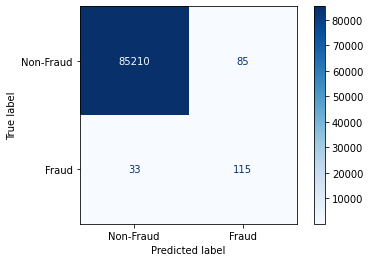

In [66]:
print_report(models["knns"], y_test_knn)

******* Model: KNN ADASYN *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.57      0.78      0.66       148

    accuracy                           1.00     85443
   macro avg       0.79      0.89      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9986072586402631
Precision: 0.572139303482587
Recall: 0.777027027027027
F1 Score: 0.659025787965616
ROC AUC Score: 0.888009380797645


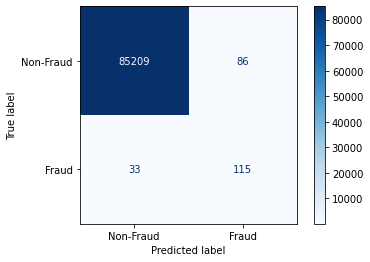

In [67]:
print_report(models["knna"], y_test_knn)

#### Naive Bayes

******* Model: Naive Bayes Unbalanced *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.61      0.67       148

    accuracy                           1.00     85443
   macro avg       0.87      0.80      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9989466661985184
Precision: 0.7377049180327869
Recall: 0.6081081081081081
F1 Score: 0.6666666666666667
ROC AUC Score: 0.8038664697876844


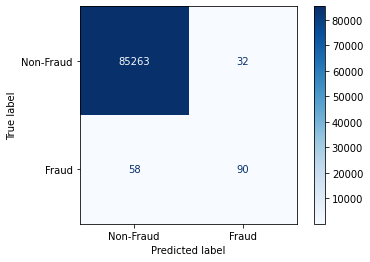

In [68]:
print_report(models["nb"], y_test_nb)

******* Model: Naive Bayes SMOTE *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.61      0.70       148

    accuracy                           1.00     85443
   macro avg       0.91      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9990871107053826
Precision: 0.8181818181818182
Recall: 0.6081081081081081
F1 Score: 0.6976744186046513
ROC AUC Score: 0.8039368138875731


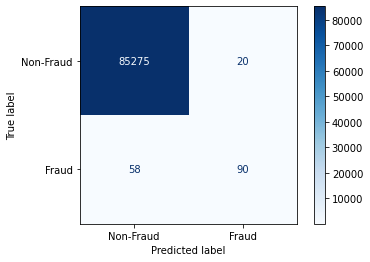

In [69]:
print_report(models["nbs"], y_test_nb)

******* Model: Naive Bayes ADASYN *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.84      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.91      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.9838956965462355
Precision: 0.08457374830852503
Recall: 0.8445945945945946
F1 Score: 0.15375153751537515
ROC AUC Score: 0.9143660000348552


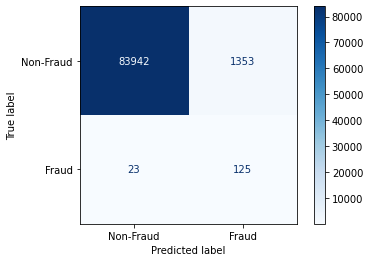

In [70]:
print_report(models["nba"], y_test_nb)

#### Random Forest

******* Model: Random Forest Unbalanced *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.76      0.84       136

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995318516437859
Precision: 0.9285714285714286
Recall: 0.7647058823529411
F1 Score: 0.8387096774193549
ROC AUC Score: 0.8823060517066733


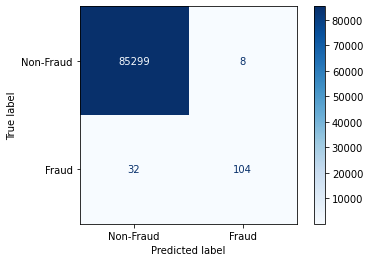

In [71]:
print_report(models["rf"], y_test_rf)

******* Model: Random Forest SMOTE *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.85      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995201479348805
Precision: 0.8467153284671532
Recall: 0.8529411764705882
F1 Score: 0.8498168498168498
ROC AUC Score: 0.9263475033770762


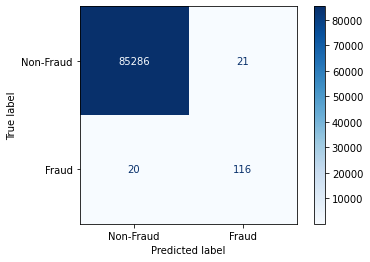

In [72]:
print_report(models["rfs"], y_test_rf)

******* Model: Random Forest ADASYN *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.86      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995318516437859
Precision: 0.8478260869565217
Recall: 0.8602941176470589
F1 Score: 0.854014598540146
ROC AUC Score: 0.9300239739653114


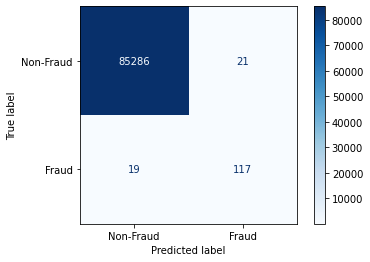

In [73]:
print_report(models["rfa"], y_test_rf)

#### Redes Neurais

******* Model: Neural Network Unbalanced *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.83      0.86       136

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995552590615966
Precision: 0.8828125
Recall: 0.8308823529411765
F1 Score: 0.856060606060606
ROC AUC Score: 0.9153532587147184


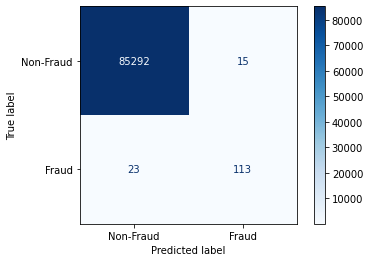

In [74]:
print_report(models["mlp"], y_test_mlp)

******* Model: Neural Network SMOTE *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.85      0.77       136

    accuracy                           1.00     85443
   macro avg       0.85      0.93      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9991924440855307
Precision: 0.703030303030303
Recall: 0.8529411764705882
F1 Score: 0.7707641196013288
ROC AUC Score: 0.9261833902327856


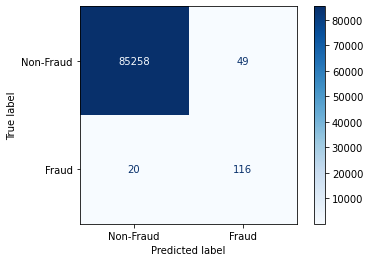

In [75]:
print_report(models["mlps"], y_test_mlp)

******* Model: Neural Network ADASYN *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.59      0.87      0.70       136

    accuracy                           1.00     85443
   macro avg       0.79      0.93      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9988179254005595
Precision: 0.5870646766169154
Recall: 0.8676470588235294
F1 Score: 0.7002967359050445
ROC AUC Score: 0.9333370511626174


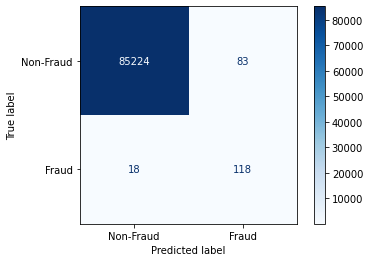

In [76]:
print_report(models["mlpa"], y_test_mlp)

#### Isolation Forests

******* Model: Isolation Forest *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.12      0.83      0.21       492

    accuracy                           0.96     85787
   macro avg       0.56      0.90      0.59     85787
weighted avg       0.99      0.96      0.98     85787

Accuracy: 0.9632112091575646
Precision: 0.11702127659574468
Recall: 0.8272357723577236
F1 Score: 0.20503778337531486
ROC AUC Score: 0.8956156586156986


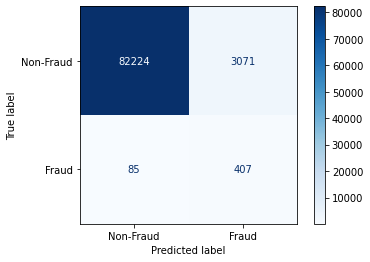

In [77]:
print_report(models["isolation_forest"], y_test_iso_for)

#### K-Means

******* Model: K-Means *******
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     85295
           1       0.00      0.56      0.01       148

    accuracy                           0.80     85443
   macro avg       0.50      0.68      0.45     85443
weighted avg       1.00      0.80      0.88     85443

Accuracy: 0.7953372423721077
Precision: 0.00474150242787775
Recall: 0.5608108108108109
F1 Score: 0.009403500821390133
ROC AUC Score: 0.6782774963837745


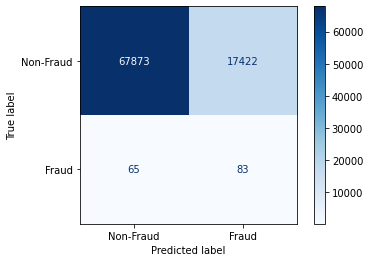

In [78]:
print_report(models["kmeans"], test_labels)

In [79]:
plt.rcdefaults()